#### Loading Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('irrigation_machine.csv')

In [3]:
data.head()

,Unnamed: 0,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


In [4]:
data.dtypes

Unnamed: 0      int64
sensor_0      float64
sensor_1      float64
sensor_2      float64
sensor_3      float64
sensor_4      float64
sensor_5      float64
sensor_6      float64
sensor_7      float64
sensor_8      float64
sensor_9      float64
sensor_10     float64
sensor_11     float64
sensor_12     float64
sensor_13     float64
sensor_14     float64
sensor_15     float64
sensor_16     float64
sensor_17     float64
sensor_18     float64
sensor_19     float64
parcel_0        int64
parcel_1        int64
parcel_2        int64
dtype: object

In [5]:
# Describe the data
print('Dataset stats: \n', data.describe())

Dataset stats: 
         Unnamed: 0     sensor_0     sensor_1     sensor_2     sensor_3  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    999.500000     1.437000     1.659000     2.654500     2.674500   
std     577.494589     1.321327     1.338512     1.699286     1.855875   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%     499.750000     0.000000     1.000000     1.000000     1.000000   
50%     999.500000     1.000000     1.000000     2.000000     2.000000   
75%    1499.250000     2.000000     2.000000     4.000000     4.000000   
max    1999.000000     8.000000     9.000000    10.000000    11.000000   

          sensor_4     sensor_5     sensor_6     sensor_7     sensor_8  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      2.887500     1.411000     3.315500     4.201500     1.214000  ...   
std       1.816451     1.339394     2.206444     2.280241     1.386782  ...   


In [6]:
# Count the number of observations of each class
print('Observations per class 0: \n', data['parcel_0'].value_counts())
print('Observations per class 1: \n', data['parcel_1'].value_counts())
print('Observations per class 2: \n', data['parcel_2'].value_counts())

Observations per class 0: 
 1    1271
0     729
Name: parcel_0, dtype: int64
Observations per class 1: 
 1    1461
0     539
Name: parcel_1, dtype: int64
Observations per class 2: 
 0    1576
1     424
Name: parcel_2, dtype: int64


#### Data preparation

In [7]:
from sklearn.model_selection import train_test_split
y = data[['parcel_0','parcel_1','parcel_2']]
X = data.drop(['parcel_0','parcel_1','parcel_2','Unnamed: 0'], axis=1)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

#### Model configuration

In [8]:
# Import the Sequential model and Dense layer
from keras.models import Sequential
from keras.layers import Dense

# Instantiate a Sequential model
model = Sequential()

# Add a hidden layer of 64 neurons and a 20 neuron's input
model.add(Dense(64, input_shape=(20,), activation='relu'))

# Add an output layer of 3 neurons with sigmoid activation
model.add(Dense(3, activation='sigmoid'))

# Compile your model with adam and binary crossentropy loss
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Using TensorFlow backend.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                1344      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 1,539
Trainable params: 1,539
Non-trainable params: 0
_________________________________________________________________


#### Model compilation

In [9]:
# Compile your model using categorical_crossentropy loss
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Model tranining

In [10]:
# Import the early stopping callback
from keras.callbacks import EarlyStopping

# Define a callback to monitor val_acc
monitor_val_acc = EarlyStopping(monitor='val_accuracy', patience=5)

# Train your model using the early stopping callback
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test), callbacks=[monitor_val_acc])


Train on 1600 samples, validate on 400 samples
Epoch 1/500
1600/1600 [==============================] - 1s 611us/step - loss: 1.5705 - accuracy: 0.2988 - val_loss: 1.4660 - val_accuracy: 0.4125
Epoch 2/500
1600/1600 [==============================] - 0s 148us/step - loss: 1.4153 - accuracy: 0.5725 - val_loss: 1.3548 - val_accuracy: 0.6225
Epoch 3/500
1600/1600 [==============================] - 0s 187us/step - loss: 1.3557 - accuracy: 0.6369 - val_loss: 1.3198 - val_accuracy: 0.6900
Epoch 4/500
1600/1600 [==============================] - 0s 130us/step - loss: 1.3319 - accuracy: 0.6656 - val_loss: 1.3030 - val_accuracy: 0.7550
Epoch 5/500
1600/1600 [==============================] - 0s 155us/step - loss: 1.3159 - accuracy: 0.6781 - val_loss: 1.2872 - val_accuracy: 0.6975
Epoch 6/500
1600/1600 [==============================] - 0s 145us/step - loss: 1.3064 - accuracy: 0.6581 - val_loss: 1.2779 - val_accuracy: 0.6925
Epoch 7/500
1600/1600 [==============================] - 0s 178us/step

In [11]:
%matplotlib inline
from matplotlib import pyplot as plt

def plot_loss(loss,val_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()
    

def plot_accuracy(acc,val_acc):
  # Plot training & validation accuracy values
  plt.figure()
  plt.plot(acc)
  plt.plot(val_acc)
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

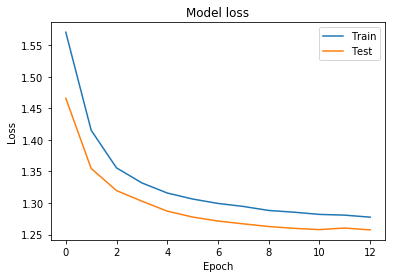

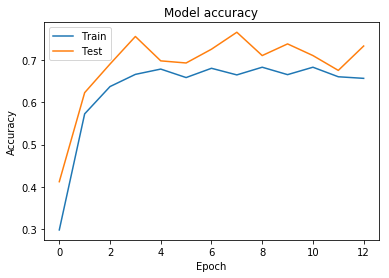

In [12]:
# Plot train vs test loss during training
plot_loss(history.history['loss'], history.history['val_loss'])

# Plot train vs test accuracy during training
plot_accuracy(history.history['accuracy'], history.history['val_accuracy'])

#### Model evaluation

In [13]:
# Evaluate your model accuracy on the test set
accuracy = model.evaluate(X_test, y_test)[1]

# Print accuracy
print('Accuracy:',accuracy)

400/400 [==============================] - 0s 90us/step
Accuracy: 0.7325000166893005


#### Predicting

In [14]:
preds = model.predict(X_test)